# Optimisation: first example

This example shows you how to run a global optimisation with Pints.

First, we import pints:

In [1]:
import pints

Next, we need a model: any class that implements the `pints.model` interface (#todo: add link).

Usually, you'd write a class for this purpose (that wrapped around whatever simulation package you wanted to use to generate your time series data). But you could also use a pure-Python model.

In the example, we use a logistic model (https://en.wikipedia.org/wiki/Logistic_function), provided by Pints's toy model module (#todo: add link):

In [2]:
import pints.toy as toy
model = toy.LogisticModel()

This model has two parameters: A growth rate (which determines the steepness of the curve) and a carrying capacity (which determines the number the curve converges to).
For the example, we simply pick some nice values:

In [3]:
real_parameters = [0.015, 500]

Finally, we create a list of times (in a real experiment, these would be the times at which the time series was sampled)

In [4]:
import numpy as np
times = np.linspace(0, 1000, 1000)

We now have everything we need to run a simulation and generate some toy data:

In [5]:
values = model.simulate(real_parameters, times)

We can use matplotlib (or any other plotting package) to have a look at the generated data:

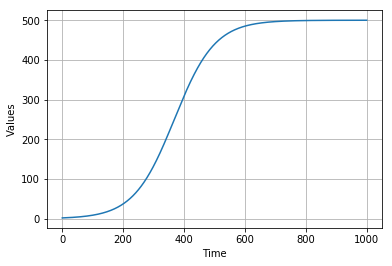

In [6]:
import matplotlib.pyplot as pl

pl.figure()
pl.xlabel('Time')
pl.ylabel('Values')
pl.plot(times, values)
pl.show()

If you like, you can make it more realistic at this point by adding some noise:

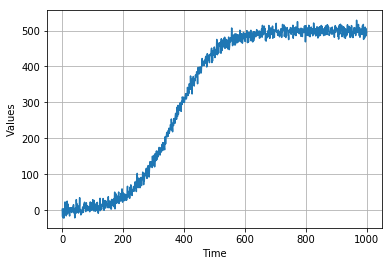

In [7]:
values += np.random.normal(size=values.shape) * 10

pl.figure()
pl.xlabel('Time')
pl.ylabel('Values')
pl.plot(times, values)
pl.show()

We now set up an optimisation, to see if we can recover our original parameters from this data.

First, we define a problem (in this case a single time series fitting problem):

In [8]:
problem = pints.SingleSeriesProblem(model, times, values)

We then define a score function on this problem:

In [9]:
score = pints.SumOfSquaresError(problem)

A lot of real problems have physical constraints on the values the parameters can take, so in this example we add them in the form of _boundaries_:

In [10]:
boundaries = pints.Boundaries([0, 200], [1, 1000])

We now run an optimisation, using the `xnes` method (although we could also have used a different global optimiser, like `cmaes` or `pso`):

In [11]:
found_parameters, found_value = pints.xnes(
    score,
    boundaries,
    )

Running in parallel mode with population size 8
1: 50155594.8803
2: 46347431.2776
3: 40179290.816
20: 7006590.81766
40: 204069.279534
60: 104141.720375
80: 104141.289587
100: 104141.289578
120: 104141.289578
140: 104141.289578
160: 104141.289578
180: 104141.289578
200: 104141.289578
220: 104141.289578
Halting: No significant change for 100 iterations.
229: 104141.289578


In our toy model example, we can compare the parameters with the known true parameters:

In [12]:
print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Score at true solution: 
104601.343593
Found solution:          True parameters:
 1.50330525735142828e-02     1.49999999999999994e-02
 4.99243639875733606e+02     5.00000000000000000e+02


In real life, we might compare the fit by running a simulation and comparing with the data:

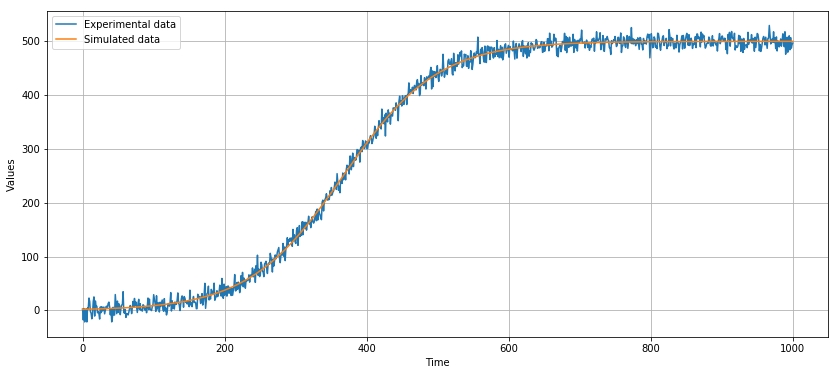

In [17]:
values2 = model.simulate(found_parameters, times)

pl.figure(figsize=(14, 6))
pl.xlabel('Time')
pl.ylabel('Values')
pl.plot(times, values, label='Experimental data')
pl.plot(times, values2, label='Simulated data')
pl.legend()
pl.show()